# **Loan Prediction Project**

# **Objective**
The objective of this machine learning project is to build a model that accurately predicts whether a customer is eligible for a loan or not based on various attributes such as marital status, education, number of dependents, employment status, etc.

# Import Libraries

In [476]:
import numpy as np
import matplotlib.pyplot as plt             
import pandas as pd
import seaborn as sns
import warnings
import plotly.express as ex
warnings.filterwarnings('ignore')
%matplotlib inline

# Import Datasets

In [477]:
# used for training models
train_data=pd.read_csv('Loan train data.csv') 

In [478]:
# used for predictions
customer_data=pd.read_csv('New Customer.csv')

# Overview of Both Datasets

Analyze the features included in the dataset such as marital status, education, number of dependents, employment status, etc.
Understand the target variable which indicates the loan status for each customer.

In [479]:
train_data.head(7)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [480]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [481]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [482]:
customer_data.head(7)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban


In [483]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [484]:
customer_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [485]:
train_data.drop(columns=['Loan_ID'],inplace=True)
customer_data.drop(columns=['Loan_ID'],inplace=True)

# Data Preprocessing

* **Handle missing values:** Impute or remove missing values in the dataset.

* **Handle outliers:** Identify and handle outliers if present in the datase

* **Encode categorical variables:** Convert categorical variables into numerical format using techniques like one-hot encoding or label encoding.

* **Feature scaling:**  Scale the features if necessary to bring them to a similar scale.

## Handling Nulls

In [486]:
train_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

* For addressing missing values in Categorical data.
 One common strategy is to replace null values with the **mode**.

In [487]:
train_data['Gender'].fillna(value=train_data['Gender'].mode()[0],inplace=True)
train_data['Married'].fillna(value=train_data['Married'].mode()[0],inplace=True)
train_data['Dependents'].fillna(value=train_data['Dependents'].mode()[0],inplace=True)
train_data['Self_Employed'].fillna(value=train_data['Self_Employed'].mode()[0],inplace=True)
train_data['Credit_History'].fillna(value=train_data['Credit_History'].mode()[0],inplace=True)

* As for in numerical data, specifically for attributes like **loan amount** and **loan amount term.**
One common strategy is to replace null values with the **median**, especially when the distribution of the data is skewed.

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

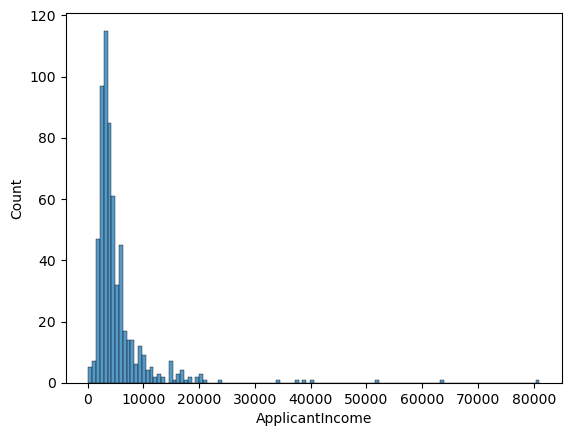

In [488]:
sns.histplot(train_data['ApplicantIncome'])

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

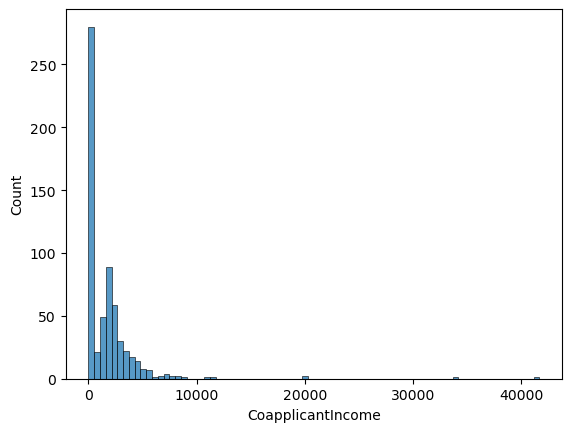

In [489]:
sns.histplot(train_data['CoapplicantIncome'])

<Axes: xlabel='LoanAmount', ylabel='Count'>

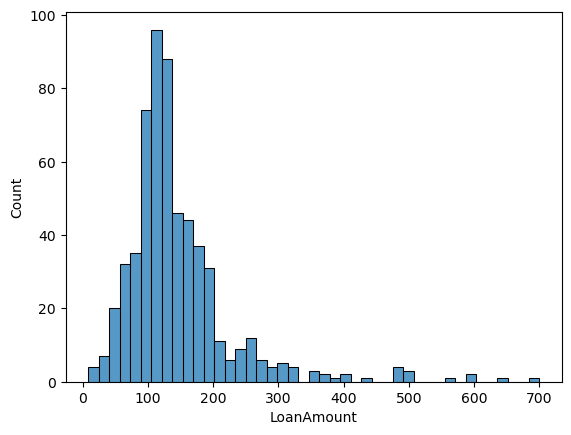

In [490]:
sns.histplot(train_data['LoanAmount'])

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

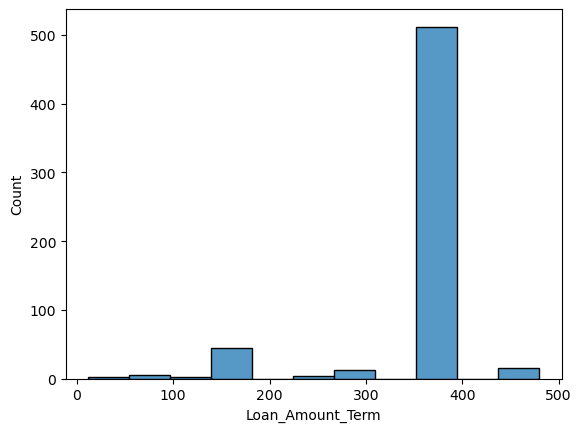

In [491]:
sns.histplot(train_data['Loan_Amount_Term'])

In [492]:
train_data['LoanAmount'].fillna(value=train_data['LoanAmount'].median(),inplace=True)
train_data['Loan_Amount_Term'].fillna(value=train_data['Loan_Amount_Term'].median(),inplace=True)
train_data['ApplicantIncome'].fillna(value=train_data['ApplicantIncome'].median(),inplace=True)
train_data['CoapplicantIncome'].fillna(value=train_data['CoapplicantIncome'].median(),inplace=True)

In [493]:
train_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Handling Outliers

<Axes: xlabel='Married', ylabel='LoanAmount'>

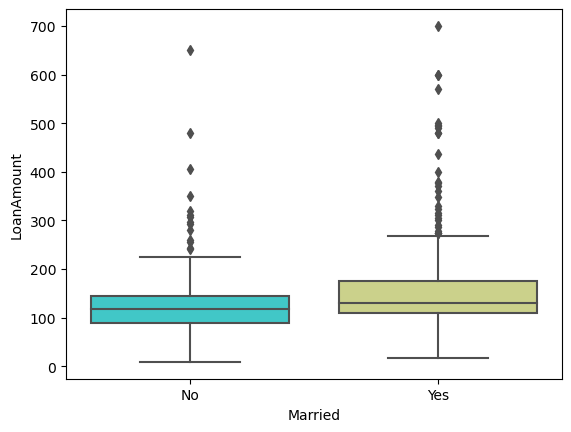

In [494]:
sns.boxplot(x="Married", y="LoanAmount", data=train_data,palette='rainbow')

<Axes: xlabel='Dependents', ylabel='LoanAmount'>

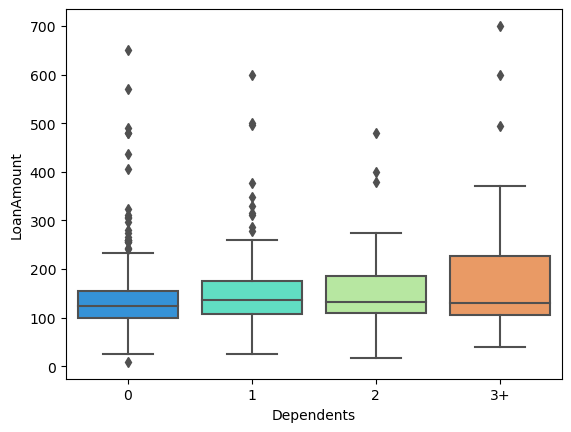

In [495]:
sns.boxplot(x="Dependents", y="LoanAmount", data=train_data,palette='rainbow')

<Axes: xlabel='Self_Employed', ylabel='LoanAmount'>

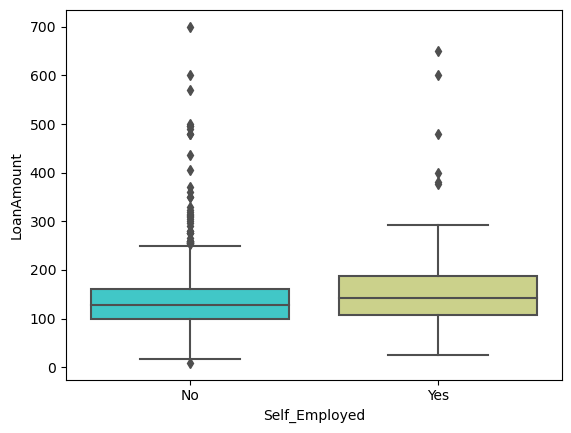

In [496]:
sns.boxplot(x="Self_Employed", y="LoanAmount", data=train_data,palette='rainbow')

* Calculating how much outliers there is.

In [497]:
def outliers(data):

    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    IQR = Q3 - Q1
    
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    lower_outlier=train_data[data<lower_whisker]
    upper_outlier=train_data[data>upper_whisker]

    outliers=len(lower_outlier)+len(upper_outlier)

    return str(outliers)
 
print("Total Outliers in ApplicantIncome = "+outliers(train_data['ApplicantIncome']))
print("Total Outliers in CoapplicantIncome = "+outliers(train_data['CoapplicantIncome']))
print("Total Outliers in LoanAmount = "+outliers(train_data['LoanAmount']))
print("Total Outliers in Loan_Amount_Term = "+outliers(train_data['Loan_Amount_Term']))
    

Total Outliers in ApplicantIncome = 50
Total Outliers in CoapplicantIncome = 18
Total Outliers in LoanAmount = 41
Total Outliers in Loan_Amount_Term = 88


In [498]:
def replace_outliers_with_whiskers(data):

    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    IQR = Q3 - Q1
    
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    

    cleaned_data = np.where(data < lower_whisker, lower_whisker, data)
    cleaned_data = np.where(data > upper_whisker, upper_whisker, cleaned_data)
    return cleaned_data

train_data['ApplicantIncome']= replace_outliers_with_whiskers(train_data['ApplicantIncome'])
train_data['CoapplicantIncome']= replace_outliers_with_whiskers(train_data['CoapplicantIncome'])
train_data['LoanAmount']= replace_outliers_with_whiskers(train_data['LoanAmount'])
train_data['Loan_Amount_Term']= replace_outliers_with_whiskers(train_data['Loan_Amount_Term'])


#### Now we check again

In [499]:
print("Total Outliers in ApplicantIncome = "+outliers(train_data['ApplicantIncome']))
print("Total Outliers in CoapplicantIncome = "+outliers(train_data['CoapplicantIncome']))
print("Total Outliers in LoanAmount = "+outliers(train_data['LoanAmount']))
print("Total Outliers in Loan_Amount_Term = "+outliers(train_data['Loan_Amount_Term']))

Total Outliers in ApplicantIncome = 0
Total Outliers in CoapplicantIncome = 0
Total Outliers in LoanAmount = 0
Total Outliers in Loan_Amount_Term = 0


<Axes: xlabel='Married', ylabel='LoanAmount'>

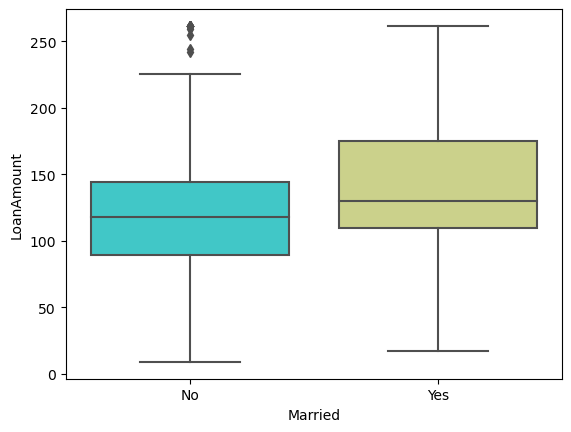

In [500]:
sns.boxplot(x="Married", y="LoanAmount", data=train_data,palette='rainbow')

<Axes: xlabel='Dependents', ylabel='LoanAmount'>

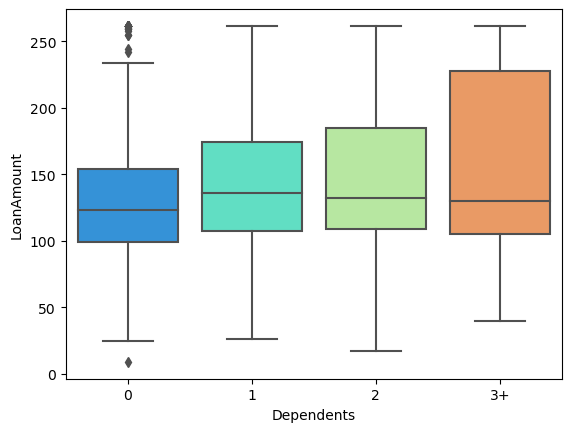

In [501]:
sns.boxplot(x="Dependents", y="LoanAmount", data=train_data,palette='rainbow')

<Axes: xlabel='Self_Employed', ylabel='LoanAmount'>

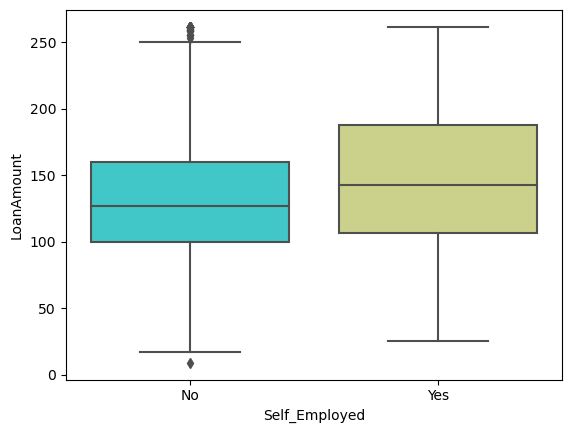

In [502]:
sns.boxplot(x="Self_Employed", y="LoanAmount", data=train_data,palette='rainbow')

# We repeat the same steps with the Customer Dataset

## Handling Nulls

In [503]:
customer_data.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [504]:
customer_data['Gender'].fillna(value=customer_data['Gender'].mode()[0],inplace=True)
customer_data['Dependents'].fillna(value=customer_data['Dependents'].mode()[0],inplace=True)
customer_data['Self_Employed'].fillna(value=customer_data['Self_Employed'].mode()[0],inplace=True)
customer_data['Credit_History'].fillna(value=customer_data['Credit_History'].mode()[0],inplace=True)

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

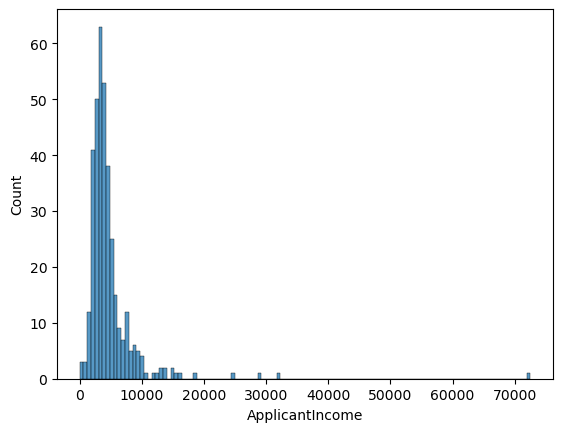

In [505]:
sns.histplot(customer_data['ApplicantIncome'])

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

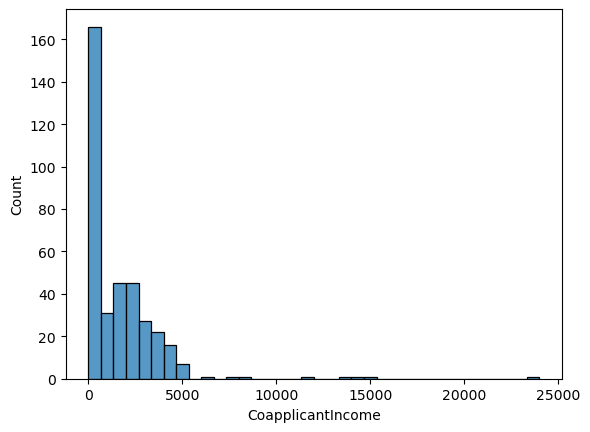

In [506]:
sns.histplot(customer_data['CoapplicantIncome'])

<Axes: xlabel='LoanAmount', ylabel='Count'>

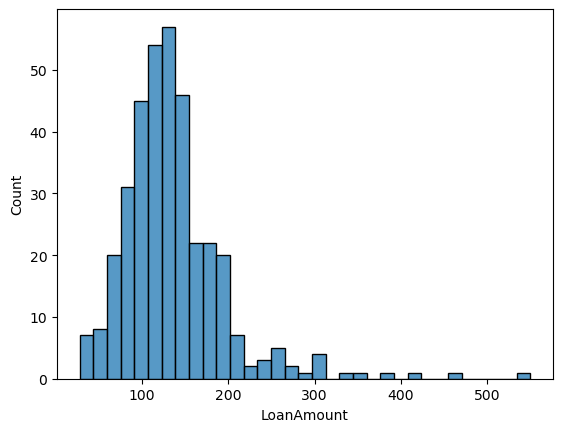

In [507]:
sns.histplot(customer_data['LoanAmount'])

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

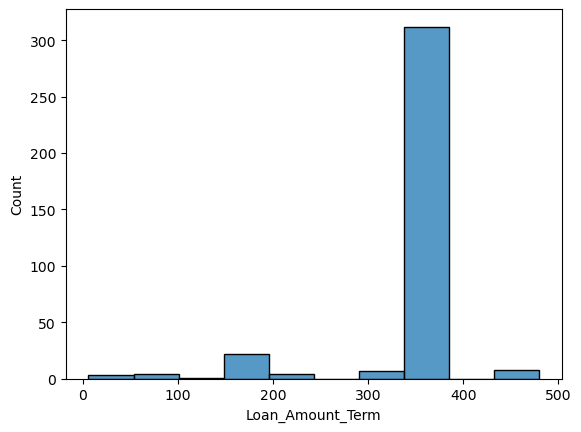

In [508]:
sns.histplot(customer_data['Loan_Amount_Term'])

In [509]:
customer_data['LoanAmount'].fillna(value=customer_data['LoanAmount'].median(),inplace=True)
customer_data['Loan_Amount_Term'].fillna(value=customer_data['Loan_Amount_Term'].median(),inplace=True)
customer_data['ApplicantIncome'].fillna(value=customer_data['ApplicantIncome'].median(),inplace=True)
customer_data['CoapplicantIncome'].fillna(value=customer_data['CoapplicantIncome'].median(),inplace=True)

In [510]:
customer_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Handling Outliers

<Axes: xlabel='Married', ylabel='LoanAmount'>

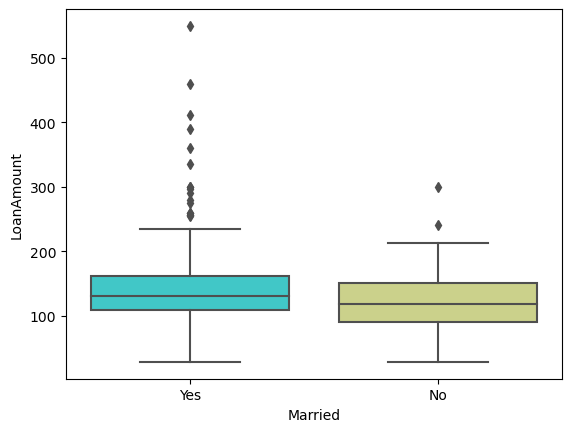

In [511]:
sns.boxplot(x="Married", y="LoanAmount", data=customer_data,palette='rainbow')

<Axes: xlabel='Dependents', ylabel='LoanAmount'>

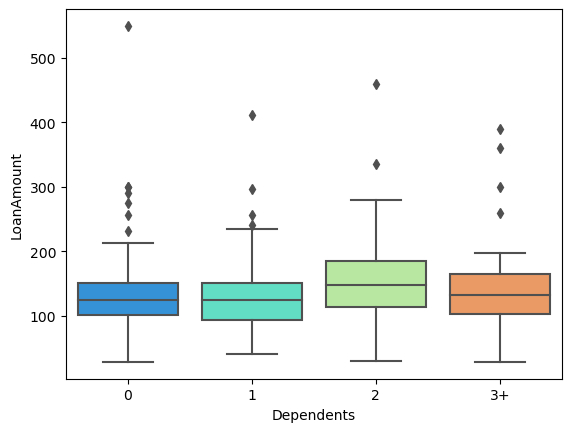

In [512]:
sns.boxplot(x="Dependents", y="LoanAmount", data=customer_data,palette='rainbow')

<Axes: xlabel='Self_Employed', ylabel='LoanAmount'>

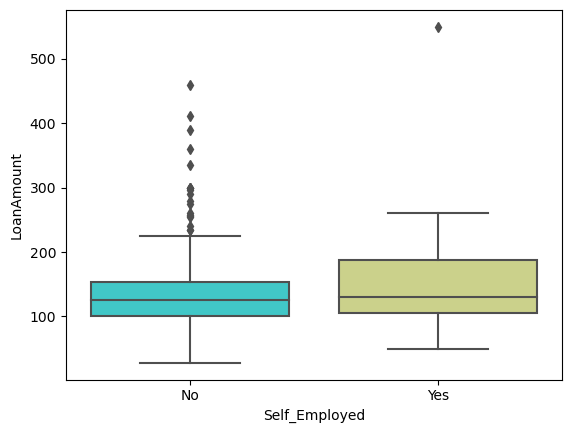

In [513]:
sns.boxplot(x="Self_Employed", y="LoanAmount", data=customer_data,palette='rainbow')

In [514]:
customer_data['LoanAmount']= replace_outliers_with_whiskers(customer_data['LoanAmount'])
customer_data['ApplicantIncome']= replace_outliers_with_whiskers(customer_data['ApplicantIncome'])
customer_data['CoapplicantIncome']= replace_outliers_with_whiskers(customer_data['CoapplicantIncome'])
customer_data['LoanAmount']= replace_outliers_with_whiskers(customer_data['LoanAmount'])
customer_data['Loan_Amount_Term']= replace_outliers_with_whiskers(customer_data['Loan_Amount_Term'])

#### Now we check again

<Axes: xlabel='Married', ylabel='LoanAmount'>

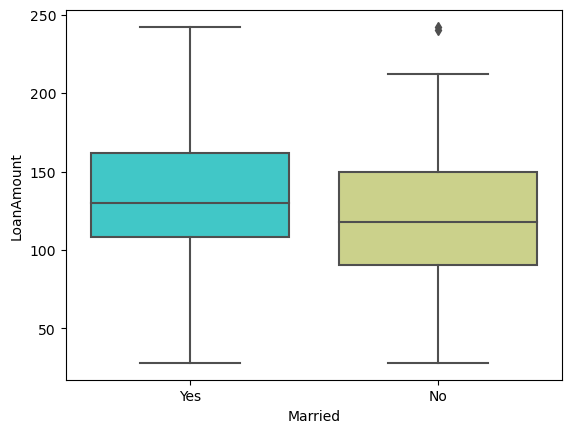

In [515]:
sns.boxplot(x="Married", y="LoanAmount", data=customer_data,palette='rainbow')

<Axes: xlabel='Dependents', ylabel='LoanAmount'>

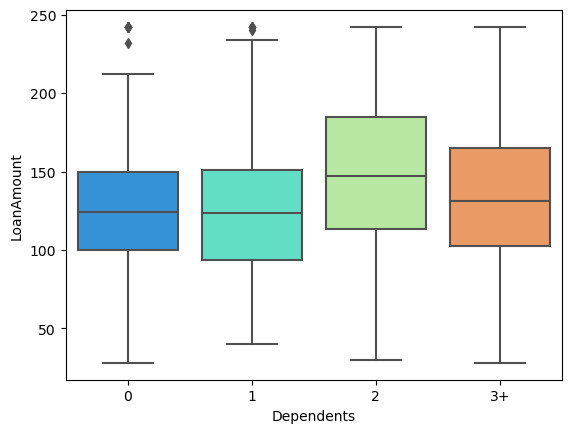

In [516]:
sns.boxplot(x="Dependents", y="LoanAmount", data=customer_data,palette='rainbow')

<Axes: xlabel='Self_Employed', ylabel='LoanAmount'>

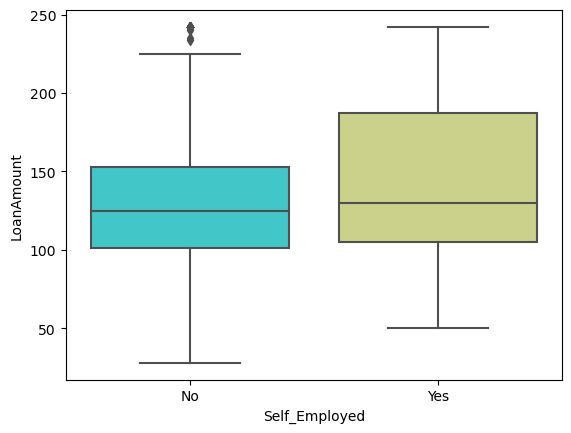

In [517]:
sns.boxplot(x="Self_Employed", y="LoanAmount", data=customer_data,palette='rainbow')

# Observations and Feature Analysis

Analyze the importance of features in predicting loan status using techniques like feature importance plots or correlation analysis.

Identify the features that play a vital role in determining whether a customer gets a loan or not.

In [558]:
ex.pie(train_data,names='Loan_Status')

In [559]:
ex.pie(train_data,names='Gender')

In [560]:
ex.pie(train_data,names='Married')

In [561]:
ex.pie(train_data,names='Self_Employed')

In [562]:
ex.pie(train_data,names='Property_Area')

In [563]:
ex.pie(train_data,names='Dependents')

<Axes: xlabel='Gender', ylabel='count'>

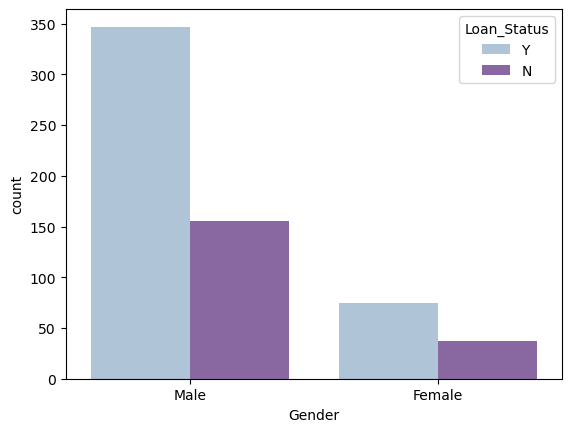

In [524]:
sns.countplot(x='Gender', data=train_data,hue='Loan_Status', palette='BuPu')

<Axes: xlabel='Married', ylabel='count'>

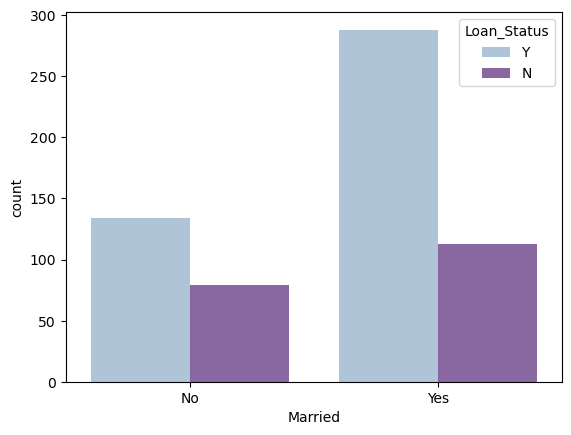

In [525]:
sns.countplot(x='Married', data=train_data,hue='Loan_Status', palette='BuPu')

<Axes: xlabel='Education', ylabel='count'>

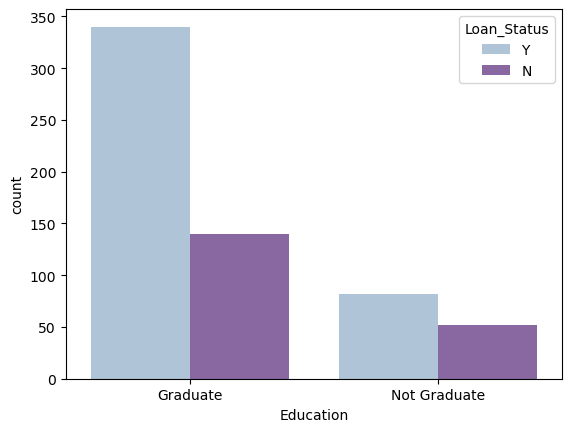

In [526]:
sns.countplot(x='Education', data=train_data,hue='Loan_Status',palette='BuPu')

<Axes: xlabel='Dependents', ylabel='count'>

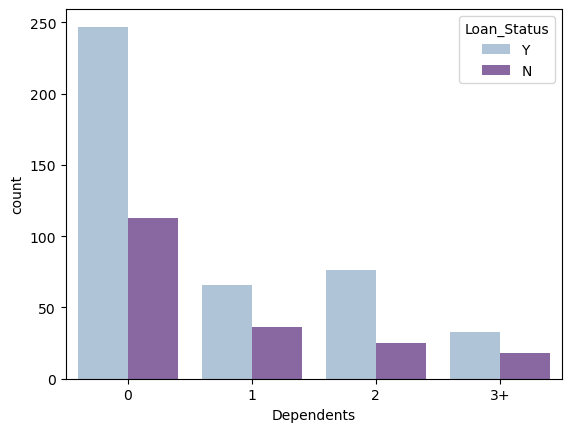

In [527]:
sns.countplot(x='Dependents', data=train_data,hue='Loan_Status',palette='BuPu')

<Axes: xlabel='Self_Employed', ylabel='count'>

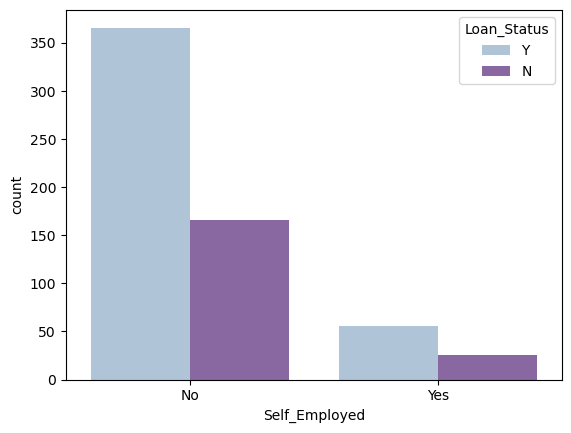

In [528]:
sns.countplot(x='Self_Employed', data=train_data,hue='Loan_Status', palette='BuPu')

<Axes: xlabel='Property_Area', ylabel='count'>

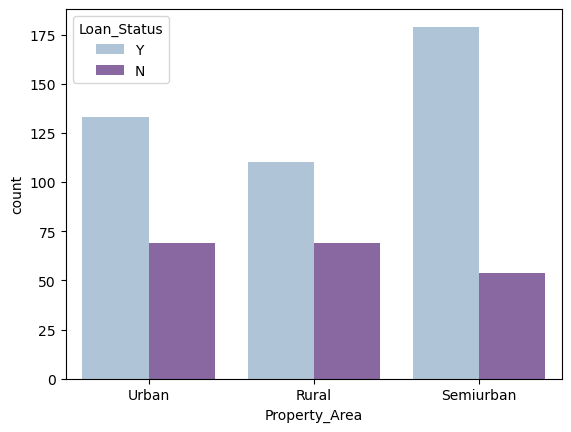

In [529]:
sns.countplot(x='Property_Area', data=train_data,hue='Loan_Status', palette='BuPu')

## Our analysis reveals notable trends among loan applicants:

* A predominant majority of loan applicants are **male**, suggesting a gender disparity in loan uptake.

* The majority of loan applicants are **married**, indicating a potential correlation between marital status and loan application behavior, perhaps driven by shared financial goals or obligations.

* A significant proportion of loan applicants hold **graduate-level** qualifications, highlighting a tendency for individuals with higher educational attainment to seek financing.

* Most loan applicants **do not report dependents**, implying a potential relationship between family structure and propensity for loan acquisition.

* A substantial portion of loan applicants are **employed rather than self-employed**, indicating that individuals in traditional employment settings are more inclined to apply for loans.





# More Cleansing of both Datasets

## Encoding Categorical Data

In [530]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [531]:
train_data['Gender'] = label_encoder.fit_transform(train_data['Gender'] )
train_data['Married'] = label_encoder.fit_transform(train_data['Married'] )
train_data['Self_Employed'] = label_encoder.fit_transform(train_data['Self_Employed'] )
train_data['Credit_History'] = label_encoder.fit_transform(train_data['Credit_History'] )
train_data['Education'] = label_encoder.fit_transform(train_data['Education'] )
train_data['Dependents'] = label_encoder.fit_transform(train_data['Dependents'] )
train_data['Loan_Status'] = label_encoder.fit_transform(train_data['Loan_Status'] )
train_data['Property_Area'] = label_encoder.fit_transform(train_data['Property_Area'] )

In [532]:
customer_data['Gender'] = label_encoder.fit_transform(customer_data['Gender'] )
customer_data['Married'] = label_encoder.fit_transform(customer_data['Married'] )
customer_data['Dependents'] = label_encoder.fit_transform(customer_data['Dependents'])
customer_data['Self_Employed'] = label_encoder.fit_transform(customer_data['Self_Employed'] )
customer_data['Credit_History'] = label_encoder.fit_transform(customer_data['Credit_History'] )
customer_data['Education'] = label_encoder.fit_transform(customer_data['Education'] )
customer_data['Property_Area'] = label_encoder.fit_transform(customer_data['Property_Area'] )

## Removing unrelated Columns

In [533]:
train_data.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.065040,0.192438,0.143426,NaN,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.022480,0.221217,0.177417,NaN,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.111565,-0.031510,0.164515,NaN,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.203087,-0.049895,-0.176194,NaN,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.237122,-0.032784,0.114297,NaN,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.065040,0.022480,0.111565,-0.203087,0.237122,1.000000,-0.228956,0.557953,NaN,0.035345,-0.028661,-0.000442
CoapplicantIncome,0.192438,0.221217,-0.031510,-0.049895,-0.032784,-0.228956,1.000000,0.265021,NaN,-0.001710,-0.074451,0.011983
LoanAmount,0.143426,0.177417,0.164515,-0.176194,0.114297,0.557953,0.265021,1.000000,NaN,0.004320,-0.075035,-0.047262
Loan_Amount_Term,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,0.035345,-0.001710,0.004320,NaN,1.000000,0.001963,0.540556


#### We found out there is no relation between the **Loan_Status** and **Loan_Amount_Term**

In [534]:
train_data.drop(columns=['Loan_Amount_Term'],inplace=True)
customer_data.drop(columns=['Loan_Amount_Term'],inplace=True)

## Feature Scaling

In [535]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()


X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(train_data.iloc[:,:-1].values, train_data.iloc[:,-1].values, test_size = 0.25, random_state = 41)
X_train_scaled=Sc.fit_transform(X_train_scaled)
X_test_scaled=Sc.transform(X_test_scaled)

customer_data_scaled=customer_data
customer_data_scaled=Sc.transform(customer_data_scaled)

# Implementing Classification Models (Logistic Regression & KNN)

* **Split** the dataset into training and testing sets.

* **Choose** and implement different classification algorithms such as Logistic Regression and KNN

* **Evaluate** the performance of each classifier using metrics like accuracy, precision, recall, and F1-score.

* **Select** the best performing classifier based on evaluation metrics.

# Import Libraries

In [536]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Split Data 

In [537]:
X_train=X_train_scaled
X_test=X_test_scaled
y_train= y_train_scaled
y_test= y_test_scaled

X_final_Test=customer_data_scaled

## Logistic Regression

In [538]:
logic_reg = LogisticRegression(random_state = 0)

In [539]:
logic_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [540]:
y_pred_logic_reg = logic_reg.predict(X_test)

### Performance Evaluation

In [541]:
cm_logic_red = confusion_matrix(y_test, y_pred_logic_reg)
cm_logic_red

array([[ 21,  32],
       [  1, 100]], dtype=int64)

In [542]:
cr_logic_reg=classification_report(y_test, y_pred_logic_reg)
print(cr_logic_reg)

              precision    recall  f1-score   support

           0       0.95      0.40      0.56        53
           1       0.76      0.99      0.86       101

    accuracy                           0.79       154
   macro avg       0.86      0.69      0.71       154
weighted avg       0.83      0.79      0.76       154



Upon thorough analysis, the developed model exhibits a commendable accuracy of 0.79.

The **confusion matrix** reveals a nuanced perspective on the model's predictive capabilities:

* True Positives (TP): The model correctly identifies 21 instances where customers are deemed eligible for loans.

* True Negatives (TN): It accurately identifies 100 instances where customers are ineligible for loans.

* False Positives (FP): The model erroneously predicts 32 instances as eligible for loans when they are not.

* False Negatives (FN): It misclassifies only 1 instance as ineligible for a loan when it should have been approved.

## K-Nearest Neighbors.

In [543]:
knn_model = KNeighborsClassifier()

#### Using GridSearch to find the best posssible K value

In [544]:
knn_param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19]} 
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5, scoring='accuracy')

In [545]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

### Performance Evaluation

In [546]:
y_pred_knn=knn_model.predict(X_test)

print(f"Testing score accuracy = {accuracy_score(y_test,y_pred_knn)}")

Testing score accuracy = 0.7662337662337663


In [547]:
cr_knn=classification_report(y_test, y_pred_knn)
print(cr_knn)

              precision    recall  f1-score   support

           0       0.81      0.42      0.55        53
           1       0.76      0.95      0.84       101

    accuracy                           0.77       154
   macro avg       0.79      0.68      0.70       154
weighted avg       0.78      0.77      0.74       154



In our analysis, it is evident that the logistic regression model results to a higher level of accuracy (0.79) compared to the K-nearest neighbors (KNN) model, which achieves an accuracy of 0.77. This finding underscores the superior predictive performance of the logistic regression approach over  KNN model in our study.

# Predicting Loan Status for New Customers

After comparing results, it appears that the best classifier is **Logistic Regression**,we will use it to predict loan status for new customers provided in the "New Customer" dataset.

In [548]:
y_Final_pred_logic_reg = logic_reg.predict(X_final_Test)

In [549]:
customer_data['Loan_Status']=y_Final_pred_logic_reg
customer_data['Loan_Status'].replace(1, 'Y', inplace=True)
customer_data['Loan_Status'].replace(0, 'N', inplace=True)
customer_data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1,1,0,0,0,5720.0,0.0,110.0,1,2,Y
1,1,1,1,0,0,3076.0,1500.0,126.0,1,2,Y
2,1,1,2,0,0,5000.0,1800.0,208.0,1,2,Y
3,1,1,2,0,0,2340.0,2546.0,100.0,1,2,Y
4,1,0,0,1,0,3276.0,0.0,78.0,1,2,Y


# Analysis of New Customer Data:

* Analyze any other interesting insights or patterns observed in the new customer data.

<Axes: xlabel='Married', ylabel='count'>

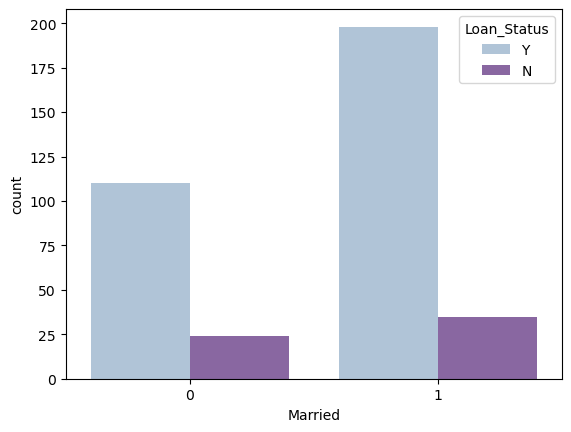

In [550]:
sns.countplot(x='Married', data=customer_data,hue='Loan_Status', palette='BuPu')

<Axes: xlabel='Self_Employed', ylabel='count'>

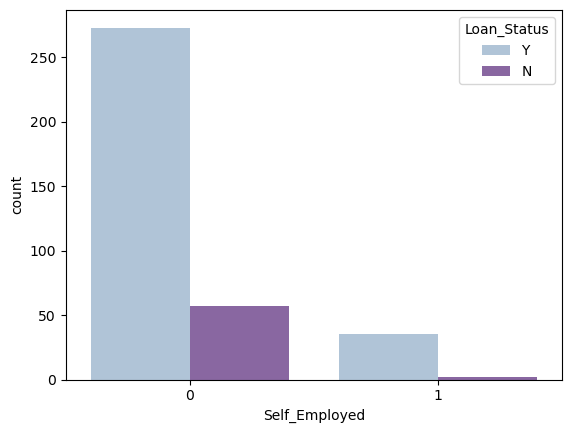

In [551]:
sns.countplot(x='Self_Employed', data=customer_data,hue='Loan_Status', palette='BuPu')

In [552]:
ex.pie(customer_data,names='Loan_Status')

* Calculate the percentage of married people in semiurban areas who obtained the loan.

In [553]:
filtered_Customer_data = customer_data[customer_data['Married']==1]
filtered_Customer_data = filtered_Customer_data[filtered_Customer_data['Property_Area']==1]
filtered_Customer_data = filtered_Customer_data[filtered_Customer_data['Loan_Status']=='Y']
filtered_Customer_data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
11,1,1,1,0,0,2185.0,1516.0,162.0,1,1,Y
17,1,1,3,0,0,3786.0,333.0,126.0,1,1,Y
28,1,1,0,0,0,3772.0,833.0,57.0,1,1,Y
42,1,1,0,1,0,1750.0,2024.0,90.0,1,1,Y
49,1,1,3,1,1,8000.0,250.0,187.0,1,1,Y


In [554]:
filtered_Customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, 11 to 361
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             57 non-null     int32  
 1   Married            57 non-null     int32  
 2   Dependents         57 non-null     int32  
 3   Education          57 non-null     int32  
 4   Self_Employed      57 non-null     int32  
 5   ApplicantIncome    57 non-null     float64
 6   CoapplicantIncome  57 non-null     float64
 7   LoanAmount         57 non-null     float64
 8   Credit_History     57 non-null     int64  
 9   Property_Area      57 non-null     int32  
 10  Loan_Status        57 non-null     object 
dtypes: float64(3), int32(6), int64(1), object(1)
memory usage: 4.0+ KB


In [555]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int32  
 1   Married            367 non-null    int32  
 2   Dependents         367 non-null    int32  
 3   Education          367 non-null    int32  
 4   Self_Employed      367 non-null    int32  
 5   ApplicantIncome    367 non-null    float64
 6   CoapplicantIncome  367 non-null    float64
 7   LoanAmount         367 non-null    float64
 8   Credit_History     367 non-null    int64  
 9   Property_Area      367 non-null    int32  
 10  Loan_Status        367 non-null    object 
dtypes: float64(3), int32(6), int64(1), object(1)
memory usage: 23.1+ KB


In [556]:
print('The percentage='+str((57/367)*100)+'%')

The percentage=15.531335149863759%


# Conclusion:
This machine learning project aims to develop a robust model for loan prediction based on customer attributes. By following the outlined steps, we aim to build an accurate classifier that can effectively determine whether a customer is eligible for a loan or not. Additionally, analyzing the new customer data provides valuable insights into the characteristics of customers who are likely to obtain loans, aiding in better decision-making for loan approvals

## Team Memebers

#### Mostafa Mohamed Mostafa Ibrahim     
#### Nouran Haitham Othman Othman      
